In [1]:
pip install torch torchvision

   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   - -------------------------------------- 10.0/212.5 MB 50.6 MB/s eta 0:00:05
   --- ------------------------------------ 18.4/212.5 MB 45.3 MB/s eta 0:00:05
   ----- ---------------------------------- 28.0/212.5 MB 45.4 MB/s eta 0:00:05
   ------ --------------------------------- 37.0/212.5 MB 44.9 MB/s eta 0:00:04
   -------- ------------------------------- 45.6/212.5 MB 44.2 MB/s eta 0:00:04
   ---------- ----------------------------- 54.5/212.5 MB 43.8 MB/s eta 0:00:04
   ------------ --------------------------- 64.2/212.5 MB 44.3 MB/s eta 0:00:04
   ------------- -------------------------- 72.4/212.5 MB 43.5 MB/s eta 0:00:04
   -------------- ------------------------- 77.6/212.5 MB 41.8 MB/s eta 0:00:04
   --------------- ------------------------ 83.1/212.5 MB 40.1 MB/s eta 0:00:04
   ---------------- ----------------------- 87.8/212.5 MB 38.7 MB/s eta 0:00:04
   ----------------- ---------------------- 93.6/

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loading the Fashion-MNIST dataset from TorchVision
- root: Specifies the directory where the training/test data will be stored.
- train: Indicates whether the dataset is for training (True) or testing (False).
- download=True: Downloads the dataset from the internet if it is not already present in the specified root directory.
- transform and target_transform: Specify the transformations to be applied to the input features and target labels, respectively.

In [2]:
# This section loads the Fashion-MNIST dataset and prepares the data.

import torch       # Import the PyTorch library.
import torch.nn as nn   # Import the neural network module from PyTorch.
import torchvision.models as models # Import the model module from torchvision to access pretrained models.

import torchvision  
import torchvision.transforms as transforms # Import the transforms module from torchvision for data preprocessing and augmentation.
import numpy as np  # Numpy is a library for multidimensional arrays and matrix operations.
import matplotlib.pyplot as plt # Matplotlib is a library for data visualization.

default_device = 'cuda' if torch.cuda.is_available() else 'cpu'     # Set the default device to GPU (CUDA) if available, otherwise use CPU.
batch_size=128  # Define the mini-batch size to be used in the data loader.

# Load the Fashion-MNIST dataset, split it into training and test sets, and create data loaders to handle them.
# The images in the dataset are 28x28 grayscale images, and both the training and test images are converted to Torch tensors.
# The data loader provides the data in mini-batches as defined by the batch size.

train_data = torchvision.datasets.FashionMNIST(
    root = 'data', 
    train = True, 
    transform = transforms.ToTensor(), 
    download = True
)

test_data = torchvision.datasets.FashionMNIST(
    root = 'data',
    train = False,
    transform = transforms.ToTensor(),
    download= True
)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)


100.0%
100.0%
100.0%
100.0%


The MNIST dataset consists of images of handwritten digits (such as 0, 1, 2, etc.).
Fashion-MNIST, being relatively small, is often used to quickly test whether an algorithm is working correctly.

Each image is mapped to a single label, but since the dataset does not include class names, a separate variable is created to store the class names for later use when displaying images.

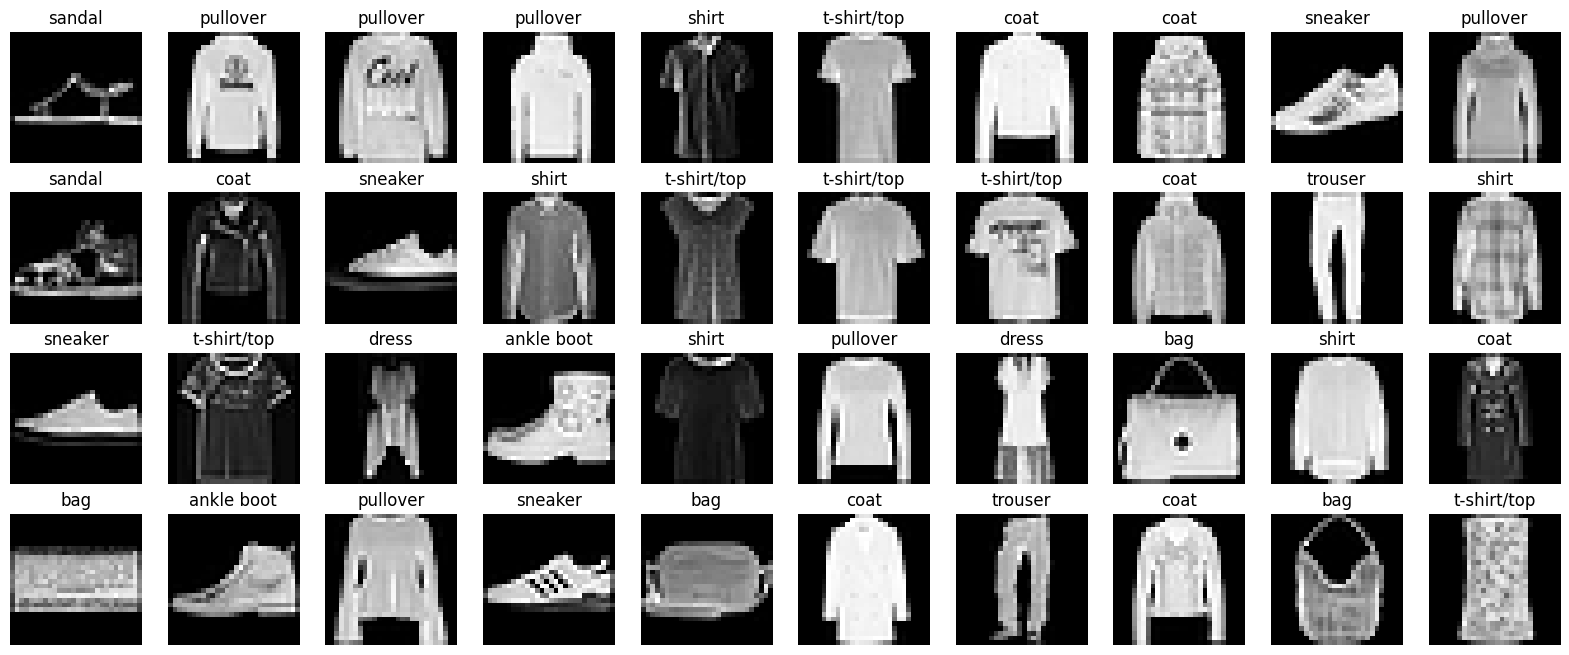

In [3]:
# This code retrieves a mini-batch of training data and visualizes the images along with their labels in grayscale.
# It is used to check the class labels of each image and to verify whether the data has been properly preprocessed.

# Define a pipeline for data preprocessing and transformation.
transform = transforms.Compose([
    # Convert the image to a PyTorch tensor. This normalizes the pixel values to a range between 0 and 1,
    # and changes the image shape to (channel, height, width).
    transforms.ToTensor(),      
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image so that each channel has a mean of 0.5 and a standard deviation of 0.5.
    # This scales pixel values to the range [-1, 1].
])

# Create a data loader to load the training data in mini-batches. `train_data` is the Fashion-MNIST training dataset.
# `shuffle=True` ensures the data is shuffled at the beginning of each epoch.
data_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle = True)

# Define a dictionary to map numeric class labels to their corresponding text descriptions.
# The class labels in Fashion-MNIST are integers from 0 to 9, and this mapping makes them more understandable.
labels_map = {
    0: "t-shirt/top",
    1: "trouser",
    2: "pullover",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "shirt",
    7: "sneaker",
    8: "bag",
    9: "ankle boot",
}

for images, labels in data_loader:  # Iterate through mini-batches of data using the data loader.
    fig, axes = plt.subplots(4,10,figsize =(20,8))  # Create a 4x10 grid of subplots. Each subplot displays one image and its label.
    for i, ax in enumerate(axes.flat):  # Flatten the 2D array of subplots and loop through each one.
        ax.imshow(images[i].squeeze(), cmap = 'gray')  # Display the current image in grayscale. `squeeze()` removes single-dimensional entries from the shape.
        ax.set_title(labels_map[labels[i].item()])  # Set the title of the subplot to the image's class label (converted from numeric to text).
        ax.axis('off')  # Disable the axis to remove x and y ticks and labels.
    plt.show()  # Display all subplots.
    break   # Exit after the first mini-batch to avoid showing too many images at once.


In the code above, the training data from the Fashion-MNIST dataset is loaded and each image is visualized in grayscale.
A pipeline for data preprocessing and transformation is defined, and the data is loaded in mini-batches for visualization.

The class labels are mapped from numeric values to descriptive text, allowing us to see how each image is categorized when visualized.
In the line plt.subplots(4, 10, figsize=(20, 8)), a 4-row by 10-column grid is created, displaying a total of 40 images.
The code is written to display the images in grayscale, and the result shows exactly that.

In [5]:
# This code defines a simple CNN model and prints a summary of its architecture.

import torch.nn as nn  # Import PyTorch's neural network module (nn), which provides various layers and functions.
# Install the torchsummary library, which provides model summary information. / Import the summary function from torchsummary to print the model's architecture.
%pip install torchsummary  
from torchsummary import summary

class SimpleCNN(nn.Module):  # Inherit from nn.Module to create a PyTorch neural network model.
    def __init__(self):  # Define the initialization method of the class.
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)  # Define a convolutional layer: input channels = 1 (grayscale), output channels = 16, kernel size = 3x3, stride = 1, padding = 1
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)       # Define a max pooling layer: extracts the maximum value from each 2x2 region, stride = 2, padding = 0
        self.fc = nn.Linear(16 * 14 * 14, 10)                               # Define a fully connected layer: input size is based on the output feature map size after conv and pooling, output size = number of classes (10)

    def forward(self, x):  # Define the forward pass method.
        x = self.pool(nn.functional.relu(self.conv1(x)))                   # Convolution -> ReLU activation -> Max pooling
        x = x.view(-1, 16 * 14 * 14)                                        # Flatten the 3D feature map into a 1D vector
        x = self.fc(x)                                                     # Pass through the fully connected layer to get final output
        return nn.functional.log_softmax(x, dim=1)                         # Apply log-softmax for multi-class classification to output probabilities
    
model = SimpleCNN()  # Create an instance of the model.
summary(model, input_size=(1,28,28))  # Use the summary function to display the model architecture. Input size is (channels, height, width), here (1, 28, 28) for grayscale images.


Note: you may need to restart the kernel to use updated packages.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
         MaxPool2d-2           [-1, 16, 14, 14]               0
            Linear-3                   [-1, 10]          31,370
Total params: 31,530
Trainable params: 31,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 0.12
Estimated Total Size (MB): 0.24
----------------------------------------------------------------



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


The input is a 28×28 grayscale image. The first convolutional layer uses 16 filters to process the input image, resulting in a feature map of size 28×28 with 16 channels.

The max pooling layer applies a 2×2 kernel with a stride of 2, reducing the spatial dimensions of the feature map by half. The output is a feature map of size 14×14 with 16 channels.

The fully connected layer takes the 16×14×14 feature map and transforms it into 10 output classes.

The total number of parameters is 31,530, all of which are trainable. The model has a very small memory footprint, requiring approximately 0.24 MB.

In [6]:
import torch.optim as optim

# Create model, loss function, and optimizer
model = SimpleCNN().to(default_device)  # Move the model to GPU or CPU using the to() function.
loss_fn = nn.CrossEntropyLoss()  # Define the cross-entropy loss function, commonly used for multi-class classification tasks.
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Create the optimizer using the Adam algorithm to optimize model parameters.

# Set the number of training epochs
epochs = 10

# Create lists to store loss and accuracy values
train_loss_history = []  # List to store training loss
train_acc_history = []   # List to store training accuracy
val_loss_history = []    # List to store validation loss
val_acc_history = []     # List to store validation accuracy

# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Iterate through the data in mini-batches
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(default_device), data[1].to(default_device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass + loss computation + backward pass + optimization
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Accumulate statistics and calculate accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Save training loss and accuracy for each epoch
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_loss_history.append(train_loss)
    train_acc_history.append(train_accuracy)

    # Evaluate the model on validation data
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(default_device), data[1].to(default_device)
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Save validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_history.append(val_loss)
    val_acc_history.append(val_accuracy)

    # Print results for each epoch
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.5477, Train Acc: 0.8141, Val Loss: 0.4276, Val Acc: 0.8492
Epoch 2/10, Train Loss: 0.3746, Train Acc: 0.8702, Val Loss: 0.3826, Val Acc: 0.8685
Epoch 3/10, Train Loss: 0.3358, Train Acc: 0.8835, Val Loss: 0.3656, Val Acc: 0.8726
Epoch 4/10, Train Loss: 0.3123, Train Acc: 0.8908, Val Loss: 0.3528, Val Acc: 0.8789
Epoch 5/10, Train Loss: 0.2957, Train Acc: 0.8956, Val Loss: 0.3426, Val Acc: 0.8822
Epoch 6/10, Train Loss: 0.2827, Train Acc: 0.8997, Val Loss: 0.3349, Val Acc: 0.8847
Epoch 7/10, Train Loss: 0.2718, Train Acc: 0.9033, Val Loss: 0.3280, Val Acc: 0.8875
Epoch 8/10, Train Loss: 0.2625, Train Acc: 0.9068, Val Loss: 0.3221, Val Acc: 0.8879
Epoch 9/10, Train Loss: 0.2541, Train Acc: 0.9094, Val Loss: 0.3174, Val Acc: 0.8907
Epoch 10/10, Train Loss: 0.2465, Train Acc: 0.9124, Val Loss: 0.3139, Val Acc: 0.8924


This code runs for 10 epochs and prints the training loss, training accuracy, test loss, and test accuracy.
From the results, we can observe that the training loss gradually decreases, while the training accuracy steadily increases.
Similarly, the test loss also decreases over time, and the test accuracy improves as well.
This indicates that the model has been trained effectively and performs well on the test data.

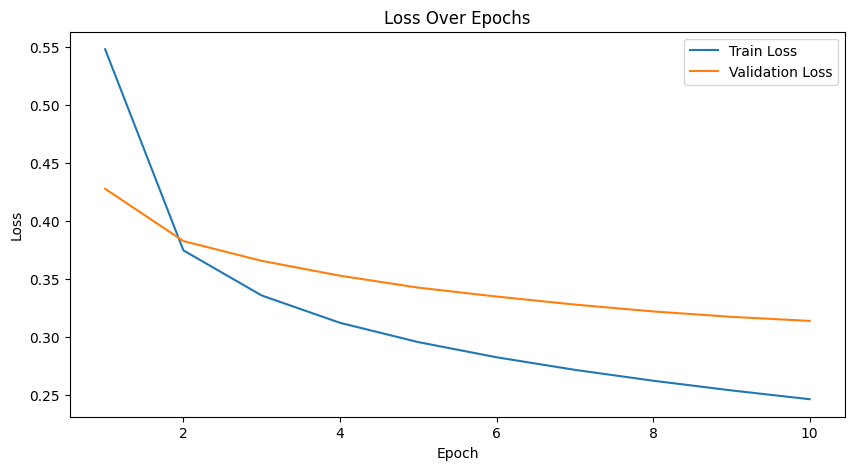

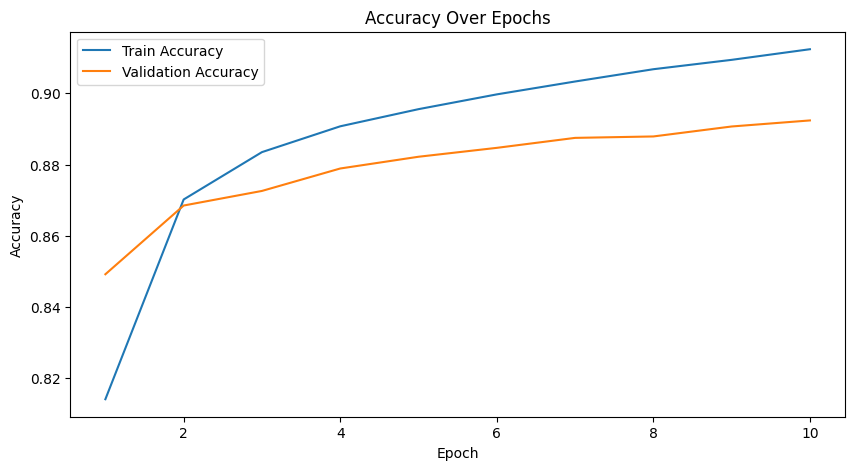

In [7]:
# This code visualizes the loss and accuracy during the training and validation process

# Plotting the loss and accuracy graphs
# The training loss is stored in the train_loss_history list,
# and the validation loss is stored in the val_loss_history list.
# Each value represents the average loss during the training or validation process.
# These graphs allow us to observe how the model's loss changes during training and validation.

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_loss_history, label='Train Loss')
plt.plot(range(1, epochs + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_acc_history, label='Train Accuracy')
plt.plot(range(1, epochs + 1), val_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()


The graphs above visualize the training and test loss, as well as the training and test accuracy.
As the number of epochs increases, we can observe that the loss gradually decreases while the accuracy steadily improves.

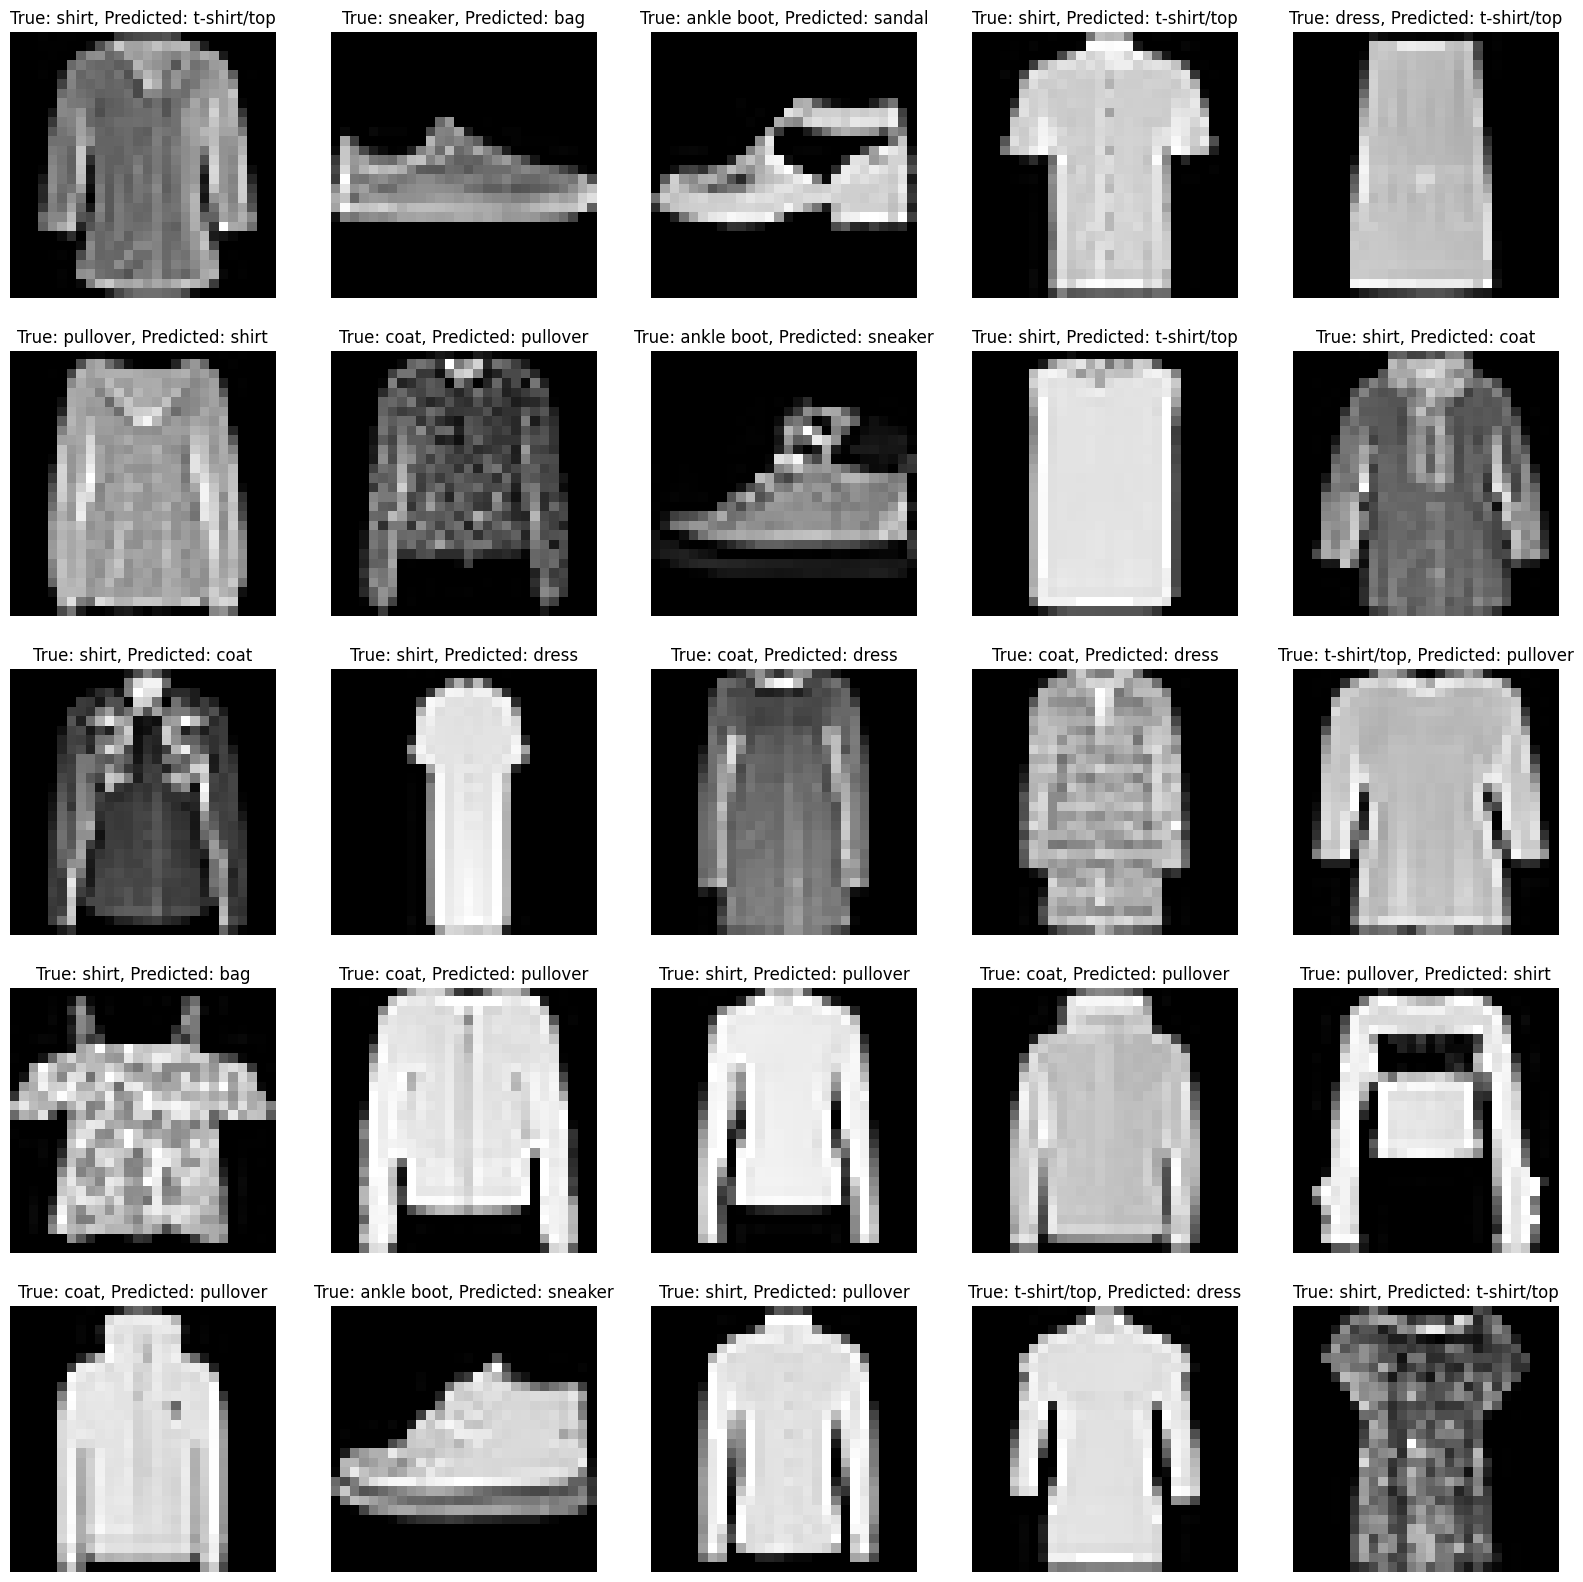

In [8]:
# This section visualizes the images that the model misclassified
import numpy as np

# Set the model to evaluation mode – this disables certain behaviors like dropout and batch normalization during evaluation
model.eval()

# Create a list to store incorrect predictions
wrong_predictions = []

# Perform predictions on the test data
with torch.no_grad():
    # Iterate through the test data using test_loader.
    # For each batch, move the data to GPU or CPU, then pass it through the model to make predictions.
    # Use torch.max() to get the highest probability and the corresponding class index for each prediction.
    for data in test_loader: 
        inputs, labels = data[0].to(default_device), data[1].to(default_device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        wrong_indices = (predicted != labels).nonzero()[:, 0]
        # Find the indices of incorrect predictions by comparing predicted and actual labels.
        # Add those indices to the wrong_predictions list.
        for idx in wrong_indices:
            wrong_predictions.append((inputs[idx].cpu(), labels[idx].cpu(), predicted[idx].cpu()))

# Randomly select 16 incorrect predictions to visualize
# For each selected index, display the image along with its true and predicted labels in a 5x5 subplot grid
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    img, true_label, predicted_label = wrong_predictions[i]
    ax.imshow(img.squeeze().numpy(), cmap='gray')
    ax.set_title(f'True: {labels_map[true_label.item()]}, Predicted: {labels_map[predicted_label.item()]}')
    ax.axis('off')
plt.show()


Each subplot displays an image that was misclassified by the model.
The label that the image should have been classified as is shown as "True", and the incorrect prediction made by the model is shown as "Predicted".